# All Architectures

### Problem:
$$\begin{cases}
-\Delta u = 2\sin(x_1)\sin(x_2) &\text{on } \Omega\\
u = \sin(x_1)\sin(x_2) &\text{on } \partial\Omega
\end{cases}$$

With weak form
$$
\mathcal{J}(v) = \int_\Omega \big( \frac{1}{2}|\nabla v|^2-2\sin(x_1)\sin(x_2)v \big)\text{d}\boldsymbol{x}
$$

Where $\Omega$ is specified by the user - choices are listed under $\textbf{Sampling in } \mathbb{R}^2$

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim, autograd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cbook as cbook
import matplotlib.patches as patches

## Shallow NN

In [4]:
class srnn(nn.Module):
    """
    srnn -- Shallow Ritz Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=0):
        super(srnn, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        self.hidden = nn.Linear(m, m)
        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

## Feedforward NN, tanh Activation

In [5]:
class drfnn2(nn.Module):
    """
    drfnn2 -- Deep Ritz Feedforward Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drfnn2, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.phi = nn.Tanh()

    def forward(self, x):        
        for i in range(len(self.stack)):
            x = self.phi(self.stack[i](x))
        x = self.output(x)
        return x

## Feedforward NN

In [6]:
class drfnn(nn.Module):
    """
    drnn -- Deep Ritz Feedforward Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drfnn, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):        
        for i in range(len(self.stack)):
            x = self.relu(self.stack[i](x))
        x = self.output(x)
        return x

## Residual NN, ReLU Activation

In [7]:
class drrnn2(nn.Module):
    """
    drrnn2 -- Deep Ritz Residual Neural Network 2: Single Layer Blocks

    Implements a residual network with a skip connection every layer
    (rather than every two layers)

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drrnn2, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        #self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):        
        x = self.input(x)
        for i in range(len(self.stack)):
            x = self.relu(self.stack[i](x)) + x
        x = self.output(x)
        return x

## Residual NN, Tanh Activation

In [8]:
class drrnn2t(nn.Module):
    """
    drrnn2t -- Deep Ritz Residual Neural Network 2: Single Layer Blocks, tanh activation

    Implements a residual network with a skip connection every layer
    (rather than every two layers)

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drrnn2t, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.tanh = nn.Tanh()

    def forward(self, x):        
        x = self.input(x)
        for i in range(len(self.stack)):
            x = self.tanh(self.stack[i](x)) + x
        x = self.output(x)
        return x

## Original Residual NN, ReLU Activation

In [9]:
class BlockReLU(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N):
        super(BlockReLU, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        #self.phi = nn.Tanh()
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.L2(self.relu(self.L1(x)))) + x

In [10]:
class drrnn3(nn.Module):
    """
    drrnn3 -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4):
        super(drrnn3, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        #self.phi = nn.Tanh()
        self.relu = nn.ReLU()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(BlockReLU(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

## Original Residual NN, Power ReLU Activation

In [11]:
class PowerReLU(nn.Module):
    """
    Implements simga(x)^(power)
    Applies a power of the rectified linear unit element-wise.

    NOTE: inplace may not be working.
    Can set inplace for inplace operation if desired.
    BUT I don't think it is working now.

    INPUT:
        x -- size (N,*) tensor where * is any number of additional
             dimensions
    OUTPUT:
        y -- size (N,*)
    """

    def __init__(self, inplace=False, power=3):
        super(PowerReLU, self).__init__()
        self.inplace = inplace
        self.power = power

    def forward(self, input):
        y = F.relu(input, inplace=self.inplace)
        return torch.pow(y, self.power)

In [12]:
class BlockPower(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N, phi=PowerReLU()):
        super(BlockPower, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        self.phi = phi

    def forward(self, x):
        return self.phi(self.L2(self.phi(self.L1(x)))) + x

In [13]:
class drrnn4(nn.Module):
    """
    drrnn4 -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4, phi=PowerReLU()):
        super(drrnn4, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        #self.phi = nn.Tanh()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(BlockPower(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

## Original Residual NN, Tanh Activation

In [14]:
class Block(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N, phi=PowerReLU()):
        super(Block, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        self.phi = nn.Tanh()

    def forward(self, x):
        return self.phi(self.L2(self.phi(self.L1(x)))) + x

In [15]:
class drrnn(nn.Module):
    """
    drrnn -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4, phi=PowerReLU()):
        super(drrnn, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        self.phi = nn.Tanh()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(Block(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

--------------------------------------------------------------------------------------------------------------------------------

# Sampling in $\mathbb{R}^2$

In [16]:
# SQUARE CENTRED AT ORIGIN, SIDE LENGTH 2
def get_interior_points_sq(N=128,d=2):
    """
    randomly sample N points from interior of [-1,1]^2
    """
    return torch.rand(N,d) * 2 - 1

def get_boundary_points_sq(N=32):
    """
    randomly sample N points from boundary of [-1,1]^2
    """
    index1 = torch.rand(N,1) * 2 - 1
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)
    xb3 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb4 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb5 = torch.cat((torch.full_like(index1, -1), index1), dim=1)
    xb = torch.cat((xb2, xb3, xb4, xb5), dim=0)

    return xb

In [17]:
# CIRCLE CENTRED AT ORIGIN
def get_interior_points_circle(N=128):
    """
    randomly sample N points from interior of {x^2 + y^2 < 1}
    """
    r = torch.rand(N)
    theta = torch.rand(N)*2*torch.pi
    x = r*torch.cos(theta)
    y = r*torch.sin(theta)
    return torch.cat((x.reshape((-1,1)),y.reshape((-1,1))), dim=1)

def get_boundary_points_circle(N=128):    
    """
    randomly sample N points from boundary of {x^2 + y^2 < 1}
    """
    theta = torch.rand(N)*2*torch.pi
    x = torch.cos(theta)
    y = torch.sin(theta)
    return torch.cat((x.reshape((-1,1)),y.reshape((-1,1))), dim=1)

In [18]:
# SQUARE IN POSITIVE QUADRANT, SIDE LENGTH 1
def get_interior_points_sq_pos(N=128,d=2):
    """
    randomly sample N points from interior of [0,1]^2
    """
    return torch.rand(N,d)

def get_boundary_points_sq_pos(N=32):
    """
    randomly sample N points from boundary of [0,1]^2
    """
    index1 = torch.rand(N,1)
    xb1 = torch.cat((torch.ones_like(index1), index1), dim=1)         # Right
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)         # Top
    xb3 = torch.cat((torch.zeros_like(index1), index1), dim=1)        # Left
    xb4 = torch.cat((index1, torch.zeros_like(index1)), dim=1)        # Bottom
    xb = torch.cat((xb1, xb2, xb3, xb4), dim=0)
    return xb

In [19]:
# ORIGINAL DOMAIN: \Omega = (-1,1)^2 \ [0,1)x{0}
def get_interior_points_original(N=128,d=2):
    """
    randomly sample N points from interior of (-1,1)^2 \ [0,1)x{0}
    """
    return torch.rand(N,d) * 2 - 1

def get_boundary_points_original(N=32):
    """
    randomly sample N points from boundary of (-1,1)^2 \ [0,1)x{0}
    """
    index = torch.rand(N,1)
    index1 = torch.rand(N,1) * 2 - 1
    xb1 = torch.cat((index, torch.zeros_like(index)), dim=1)
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)
    xb3 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb4 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb5 = torch.cat((torch.full_like(index1, -1), index1), dim=1)
    xb = torch.cat((xb1, xb2, xb3, xb4, xb5), dim=0)

    return xb

In [20]:
# BACKWARDS L-SHAPE DOMAIN: \Omega = (-1,1)^2 \ [-1,0]x[0,1]
def get_interior_points_l_shape(N=129,d=2):
    """
    randomly sample N points from interior of (-1,1)^2 \ [-1,0]x[0,1]
    """
    sq1 = torch.rand(N//3,d)                          # Top Right
    sq2 = torch.rand(N//3,d) - torch.tensor((0,1))    # Bottom Right
    sq3 = torch.rand(N//3,d) - torch.tensor((1,1))    # Bottom Left
    return torch.cat((sq1, sq2, sq3), dim=0)

def get_boundary_points_l_shape(N=32):
    """
    randomly sample N points from boundary of (-1,1)^2 \ [-1,0]x[0,1]
    """
    index = torch.rand(N//2,1)              # Short Edges
    index1 = torch.rand(N,1) * 2 - 1     # Long Edges
    
    xb1 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb2 = torch.cat((index, torch.ones_like(index)), dim=1)
    xb3 = torch.cat((torch.zeros_like(index), index), dim=1)
    xb4 = torch.cat((index - 1, torch.zeros_like(index)), dim=1)
    xb5 = torch.cat((torch.full_like(index, -1), index - 1), dim=1)
    xb6 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb = torch.cat((xb1, xb2, xb3, xb4, xb5, xb6), dim=0)

    return xb

In [21]:
#get_boundary_points_circle(N=10)
#get_interior_points(N=10)
torch.rand(10,2) - torch.tensor((1,0))

tensor([[-0.6765,  0.5846],
        [-0.5395,  0.3973],
        [-0.7579,  0.6902],
        [-0.7542,  0.8048],
        [-0.1306,  0.2340],
        [-0.8147,  0.4021],
        [-0.2078,  0.2912],
        [-0.4929,  0.2534],
        [-0.5061,  0.5610],
        [-0.0467,  0.2469]])

In [22]:
# SWITCHBOARD FOR DOMAINS
def get_points(domain='sq'):
    """
    Switchboard for domains
    """
    if domain == 'circle':
        xr = get_interior_points_circle()
        xb = get_boundary_points_circle()
        
    elif domain == 'sq pos':
        xr = get_interior_points_sq_pos()
        xb = get_boundary_points_sq_pos()
        
    elif domain == 'original':
        xr = get_interior_points_original()
        xb = get_boundary_points_original()
        
    elif domain == 'l shape':
        xr = get_interior_points_l_shape()
        xb = get_boundary_points_l_shape()
        
    else:
        xr = get_interior_points_sq()
        xb = get_boundary_points_sq()
        
    return xr, xb

--------------------------------------------------------------------------------------------------------------------------------

# Initialisation and Training

In [23]:
def weights_init(m):  # Initialise weights
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.xavier_normal_(m.weight)      # Initialisation technique using normal dist. introduced by Xavier Glorot
        nn.init.constant_(m.bias, 0.0)        # Initialise bias vectors as zero

In [24]:
def main(domain = 'sq', arch = 'drrnn', epochs = 5000, m = 10):    
    """
    main -- Training Module

    Trains a chosen model with random sampling in domain and boundary.

    Parameters:
        domain -- domain of the problem
        arch   -- architecture to be used
        m      -- width of layers
    """
    
    save_loss = torch.zeros((epochs//100, 1))     # saving loss and error values as the model is trained
    save_error = torch.zeros((epochs//100, 1))    

    in_N = 2      # Input Dimensions
    m = 10        # width of hidden layer
    out_N = 1     # Output Dimensions

    device = torch.device('cpu')
    
    if arch == 'srnn':
        model = srnn(in_N, m, out_N).to(device)
        
    elif arch == 'drfnn':
        model = drfnn(in_N, m, out_N).to(device)
        
    elif arch == 'drfnn2':
        model = drfnn2(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn2':
        model = drrnn2(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn2t':
        model = drrnn2t(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn3':
        model = drrnn3(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn4':
        model = drrnn4(in_N, m, out_N).to(device)
        
    else:
        arch = 'drrnn'
        model = drrnn(in_N, m, out_N).to(device)
        
        
    
    model.apply(weights_init)                  # Initialise weights
    criteon = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=3e-3)
    print(model)                                
    
    best_loss, best_epoch = 100000, 0          # Tracking best iteration
    
    for epoch in range(epochs+1):

        # Generate the data set
        xr, xb = get_points(domain)
        #xr = get_interior_points()            
        #xb = get_boundary_points()

        xr = xr.to(device)
        xb = xb.to(device)

        xr.requires_grad_()
        output_r = model(xr)
        output_b = model(xb)
        
        # Compute the gradient term \nabla v
        grads = autograd.grad(outputs=output_r, inputs=xr,
                              grad_outputs=torch.ones_like(output_r),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

        # Integrand of the above variational problem (averaged)
        loss_r = 0.5 * torch.sum(torch.pow(grads, 2),dim=1) - 2*torch.sin(xr[:,:1])*torch.sin(xr[:,1:])*output_r
        loss_r = torch.mean(loss_r)
        
        # Boundary data penalty term
        loss_b = output_b - torch.sin(xb[:,:1])*torch.sin(xb[:,1:])
        loss_b = torch.mean(torch.pow(loss_b,2))
        
        # Combined weighted loss
        loss = 4 * loss_r + 8 * 50 * loss_b
        # 4 = area of region, 8 = length of boundary

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print('epoch:', epoch, 'loss:', loss.item(), 'loss_r:', (4 * loss_r).item(), 'loss_b:', (8 * 50 * loss_b).item())
            save_loss[epoch//100 - 1] = loss.item()
            #error = torch.max(torch.abs(output_r - torch.sin(xr[:,:1])*torch.sin(xr[:,1:])))
            #print('sup error:', error.item())
            error = torch.sqrt(torch.mean(torch.pow((output_r - torch.sin(xr[:,:1])*torch.sin(xr[:,1:])),2)))
            print('L2 error:', error.item())
            save_error[epoch//100 - 1] = error.item()
            
            # Find minimum absolute loss in final 20% of training process
            if epoch > int(4 * epochs / 5):
                #if torch.abs(loss) < best_loss:      # Absolute value of loss
                if loss < best_loss:      # Most negative value of loss
                    best_loss = torch.abs(loss).item()
                    best_epoch = epoch
                    best_loss = loss
                    torch.save(model.state_dict(), 'new_best_deep_ritz1.mdl')
    print('best epoch:', best_epoch, 'best loss:', best_loss)

    # plot figure
    model.load_state_dict(torch.load('new_best_deep_ritz1.mdl'))
    print('load from ckpt!')
    with torch.no_grad():
        x1 = torch.linspace(-1, 1, 1001)
        x2 = torch.linspace(-1, 1, 1001)
        X, Y = torch.meshgrid(x1, x2)
        Z = torch.cat((Y.flatten()[:, None], Y.T.flatten()[:, None]), dim=1)
        Z = Z.to(device)
        pred = model(Z)

        


    plt.figure()
    pred = pred.cpu().numpy()
    pred = pred.reshape(1001, 1001)
    ax = plt.subplot(1, 1, 1)
    h = plt.imshow(pred, interpolation='nearest', cmap='jet',
                   extent=[-1, 1, -1, 1],
                   origin='lower', aspect='equal')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(h, cax=cax)
    plt.savefig('example1_'+arch+str(epochs)+'.png')
    plt.show()
    
    # Error profile
    plt.plot(save_error)
    plt.ylabel('Maximal Error From Sample')
    plt.xlabel('Iterations (100s)')
    plt.title("Training Error Profile")
    plt.savefig('example1_'+arch+str(epochs)+'_error.png')
    plt.show()
    
    # Log error profile
    plt.plot(save_error)
    plt.yscale('log')
    plt.ylabel('Maximal Error From Sample')
    plt.xlabel('Iterations (100s)')
    plt.title("Logaritmic Error Profile")
    plt.savefig('example1_'+arch+str(epochs)+'_error_log.png')
    plt.show()
                       
    # Loss profile
    plt.plot(save_loss)
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Training Loss Profile")
    plt.savefig('example1_'+arch+str(epochs)+'_loss.png')
    plt.show()
    
    # Logarithic scale loss, translated to positive numbers
    h = save_loss - torch.min(save_loss)
    plt.plot(h)
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Log Translated Training Loss Profile")
    plt.savefig('example1_'+arch+str(epochs)+'_loss_log.png')
    plt.show()
    
    # Logarithic scale loss, taking absolute value
    h = torch.abs(save_loss)
    plt.plot(h)
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Log Absolute Training Loss Profile")
    plt.savefig('example1_'+arch+str(epochs)+'_loss_abs_log.png')
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# Evaluation

drfnn(
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 0 loss: 82.53321838378906 loss_r: 0.020881613716483116 loss_b: 82.51233673095703
sup error: 0.643149733543396
L2 error: 0.292054682970047
epoch: 100 loss: 1.4739667177200317 loss_r: 0.7614859938621521 loss_b: 0.7124807238578796
sup error: 0.29359111189842224
L2 error: 0.1062600314617157
epoch: 200 loss: 0.8907684087753296 loss_r: 0.60832

epoch: 5000 loss: 0.3793080449104309 loss_r: 0.34488704800605774 loss_b: 0.03442101180553436
sup error: 0.13338933885097504
L2 error: 0.05480686202645302
best epoch: 4100 best loss: tensor(0.3076, grad_fn=<AddBackward0>)
load from ckpt!


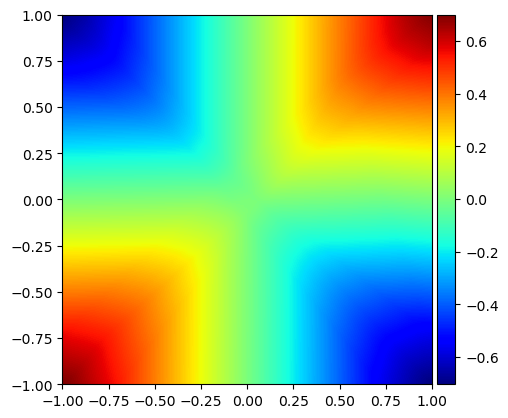

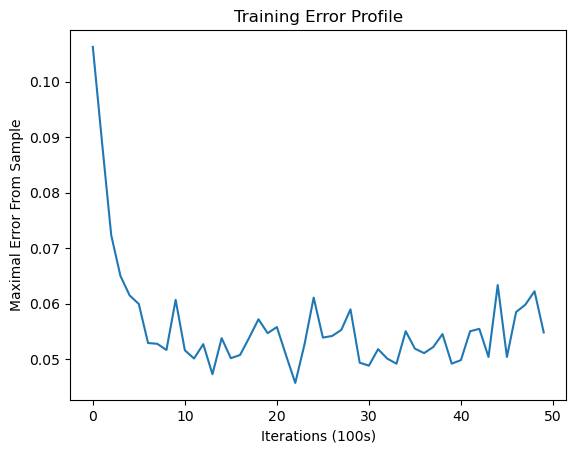

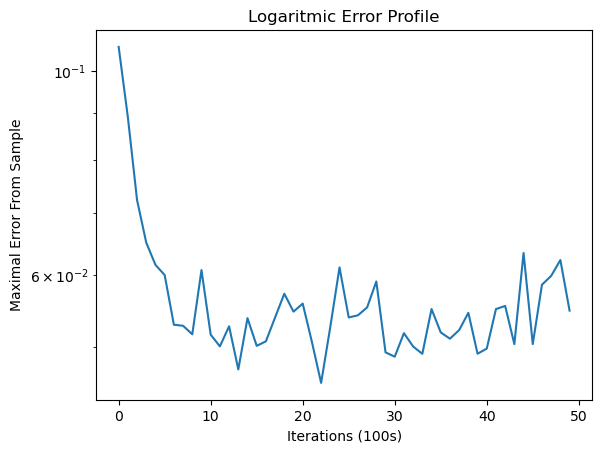

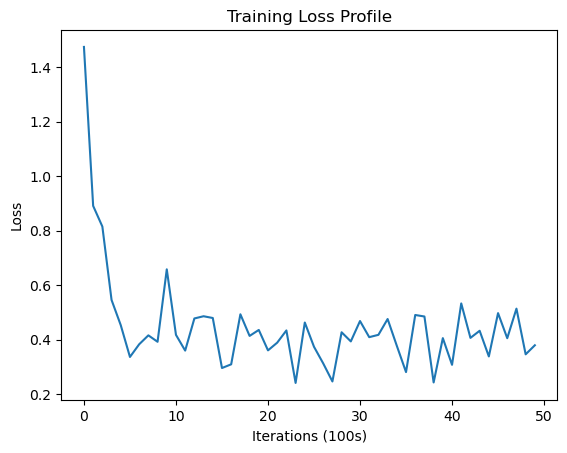

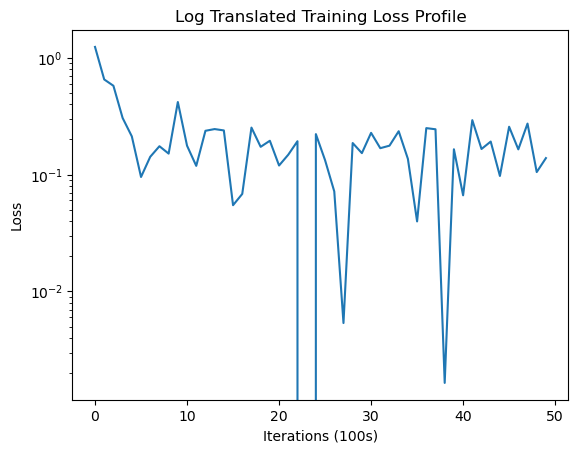

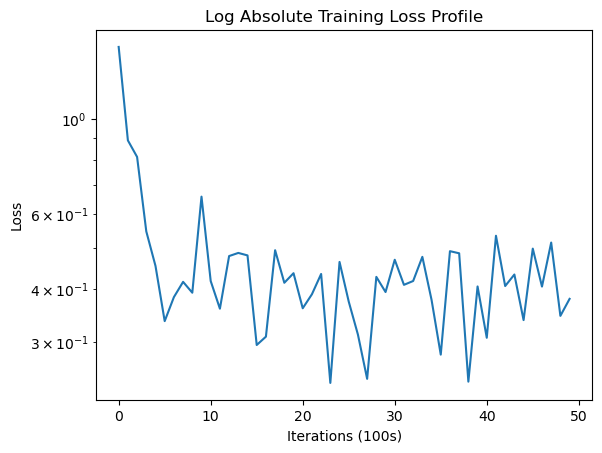

In [26]:
main('sq','drfnn')

# Plotting

load from ckpt!


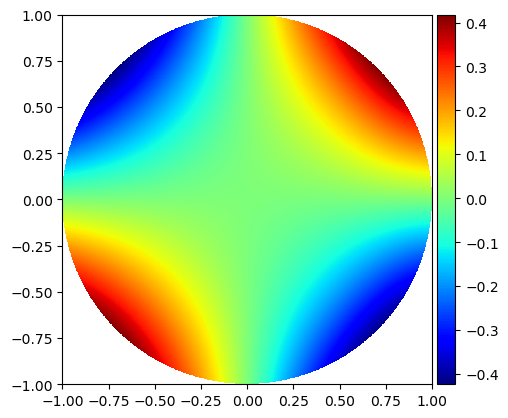

In [87]:
# LOAD TRAINED MODEL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

in_N = 2      # Input Dimensions
m = 10        # width of hidden layer
out_N = 1     # Output Dimensions

device = torch.device('cpu')
model = drrnn(in_N, m, out_N).to(device)
    
# PLOT SETUP
model.load_state_dict(torch.load('new_best_deep_ritz1.mdl'))
print('load from ckpt!')
num_points=1001
x1 = torch.linspace(-1, 1, 1001)
x2 = torch.linspace(-1, 1, 1001)
X, Y = torch.meshgrid(x1, x2)

# CHOOSE DOMAIN
# Square
mask = (np.abs(X) >= 0)
# Circle
mask = (np.sqrt(X**2 + Y**2) <= 1)
# L-shape
mask1 = (X <= 0) #or (Y <= 0)
mask2 = (Y >= 0)
#mask = mask1 + mask2

# EVALUATE MODEL IN [-1,1]^2
Z = torch.cat((X.flatten()[:, None], Y.flatten()[:, None]), dim=1)
Z = Z.to(device)
with torch.no_grad():
    pred = model(Z)


# CROP/MASK TO DOMAIN USING NaN
pred_full = np.empty((num_points, num_points))
pred_full.fill(np.nan)
np.putmask(pred_full, mask, pred.cpu().numpy())

# PLOT
plt.figure()
ax = plt.subplot(1, 1, 1)
h = plt.imshow(pred_full, interpolation='nearest', cmap='jet',
               extent=[-1, 1, -1, 1],
               origin='lower', aspect='equal',
               vmin=np.nanmin(pred_full), vmax=np.nanmax(pred_full))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.show()

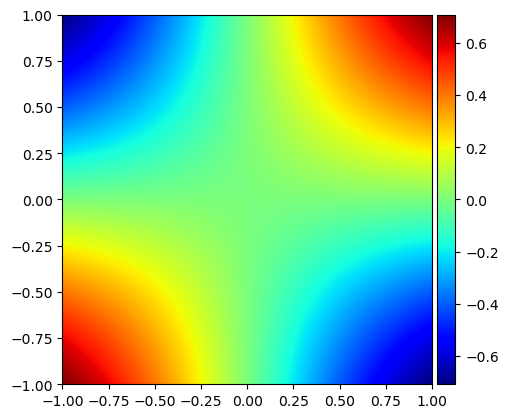

In [31]:
# PLOT OF THE TRUE SOLUTION
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

num_points=1001
x1 = torch.linspace(-1, 1, 1001)
x2 = torch.linspace(-1, 1, 1001)
X, Y = torch.meshgrid(x1, x2)

Z = np.sin(X)*np.sin(Y)


# PLOT
plt.figure()
ax = plt.subplot(1, 1, 1)
h = plt.imshow(Z, interpolation='nearest', cmap='jet',
               extent=[-1, 1, -1, 1],
               origin='lower', aspect='equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.savefig('example1_true_sol.png')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# Results

Approximations made by each model after training for 5000 epochs.

### Shallow Neural Network
Architecture: One hidden layer, width 10. ReLU Activation.

![alt text](example1_srnn5000.png "Title")
![alt text](example1_srnn5000_error.png "Title")
![alt text](example1_srnn5000_loss.png "Title")


### Feedforward Neural Network
Architecture: 8 hidden layers, width 10. ReLU Activation.

![alt text](example1_drfnn5000.png "Title")
![alt text](example1_drfnn5000_error.png "Title")
![alt text](example1_drfnn5000_loss.png "Title")



### (Simple) Residual Neural Network
Architecture: 8 hidden layers, width 10, each with skip connection. ReLU Activation.

![alt text](example1_drrnn25000.png "Title")
![alt text](example1_drrnn25000_error.png "Title")
![alt text](example1_drrnn25000_loss.png "Title")

### (Original) Residual Neural Network
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. Tanh Activation.

![alt text](example1_drrnn5000.png "Title")
![alt text](example1_drrnn5000_error.png "Title")
![alt text](example1_drrnn5000_loss.png "Title")

### (Original) Residual Neural Network, ReLU Activation
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. ReLU Activation.

![alt text](example1_drrnn35000.png "Title")
![alt text](example1_drrnn35000_error.png "Title")
![alt text](example1_drrnn35000_loss.png "Title")

### (Original) Residual Neural Network, ReLU3 Activation
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. ReLU3 Activation.

![alt text](example1_drrnn45000.png "Title")
![alt text](example1_drrnn45000_error.png "Title")
![alt text](example1_drrnn45000_loss.png "Title")

--------------------------------------------------------------------------------------------------------------------------------